In [3]:
import os
import csv
import netCDF4 as netcdf
import xarray as xr
import glob
import matplotlib.pyplot as plt
import numpy as np



Nimbus6-SCAMS_1976m0320t182109_o03787_DS18_era5.nc
Nimbus6-SCAMS_1976m0314t223237_o03709_DS18_era5.nc
Nimbus6-SCAMS_1976m0316t103901_o03729_DS18_era5.nc
Nimbus6-SCAMS_1976m0312t183709_o03680_DS18_era5.nc
Nimbus6-SCAMS_1976m0319t190213_o03774_DS18_era5.nc
Nimbus6-SCAMS_1976m0316t140749_o03731_DS18_era5.nc
Nimbus6-SCAMS_1976m0318t091237_o03755_DS18_era5.nc
Nimbus6-SCAMS_1976m0311t210541_o03668_DS18_era5.nc
Nimbus6-SCAMS_1976m0324t120733_o03837_DS18_era5.nc
Nimbus6-SCAMS_1976m0330t061341_o03914_DS19_era5.nc
Nimbus6-SCAMS_1976m0307t183445_o03613_DS17_era5.nc
Nimbus6-SCAMS_1976m0319t101845_o03769_DS18_era5.nc
Nimbus6-SCAMS_1976m0318t161621_o03759_DS18_era5.nc
Nimbus6-SCAMS_1976m0312t080957_o03674_DS18_era5.nc
Nimbus6-SCAMS_1976m0314t101949_o03702_DS18_era5.nc
Nimbus6-SCAMS_1976m0302t215848_o03548_DS17_era5.nc
Nimbus6-SCAMS_1976m0329t205549_o03909_DS19_era5.nc
Nimbus6-SCAMS_1976m0316t210853_o03735_DS18_era5.nc
Nimbus6-SCAMS_1976m0303t035120_o03551_DS17_era5.nc
Nimbus6-SCAMS_1976m0327t063445_

Text(0.5, 1.0, 'TB from Channel 1')

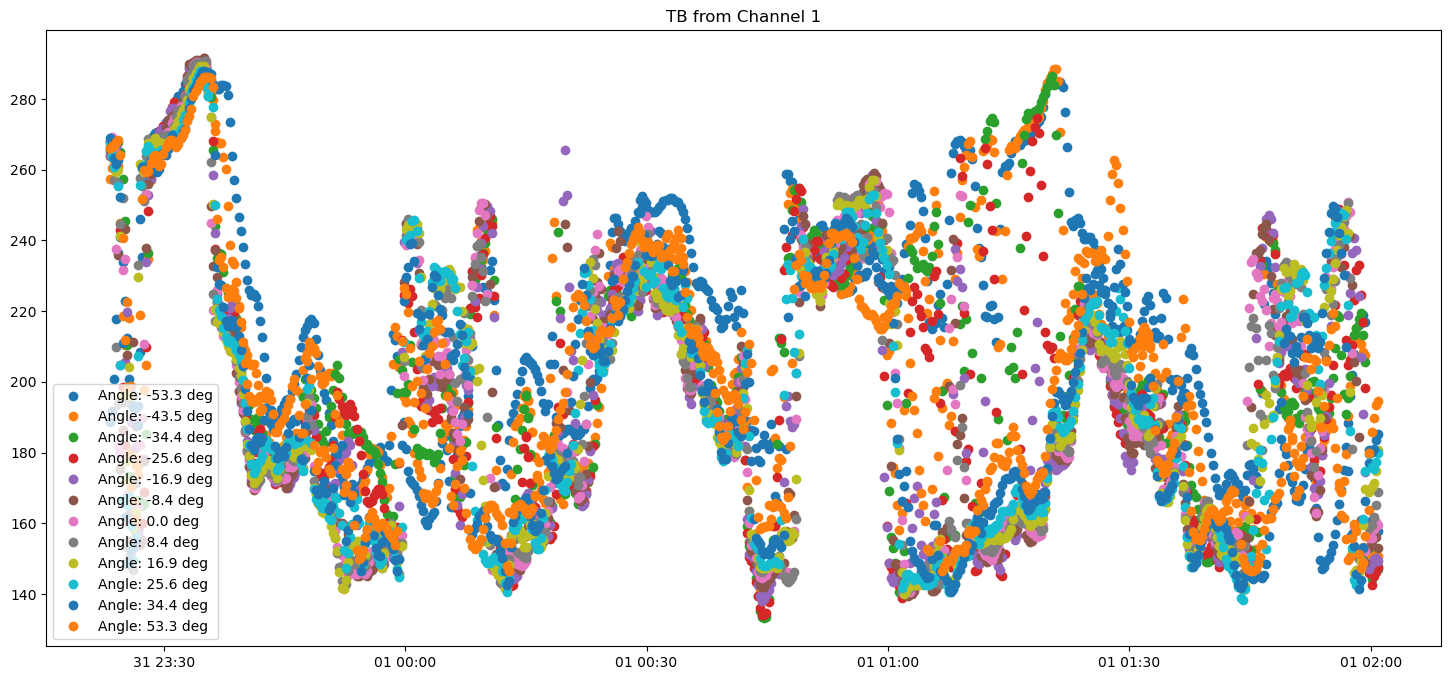

In [4]:
scams_file1 = "SCAMS_colocated/Nimbus6-SCAMS_1976m0331t232317_o03937_DS19_era5.nc"
scams_file2 = "SCAMS_colocated/Nimbus6-SCAMS_1976m0301t041848_o03524_DS17_era5.nc"

directory = '/Users/jennybrun/Documents/Skole/DTU/Skole/Fall25/Remote Sensing/Project2/SCAMS_colocated/'
k = 0
for filen in os.listdir(directory):
    if filen.endswith('.nc') & k < 5:
        #filepath = os.path.join(directory, filename)
        print(filen)
        #ds = xr.open_dataset(filen)
        k += 1



ds1 = xr.open_dataset(scams_file1)
ds2 = xr.open_dataset(scams_file2)

tbch1 = ds1.TBCH1
tbch2 = ds1.TBCH2
t = tbch1.Time
lon = ds2.LON
lat = ds2.LAT

orbit_time = int((t[-1] - t[1])/1000000000/60) 
print(f'orbit time: {orbit_time} minutes')
angles = [-53.3, -43.5, -34.4, -25.6, -16.9, -8.4, 0.0, 8.4, 16.9, 25.6, 34.4, 53.3]
fig = plt.figure(figsize= (18, 8))
for i in range(len(angles)):
    tbch_1 = tbch1[:, i]
    plt.plot(t[1:], tbch_1[1:], "o", label="Angle: " + str(angles[i]) + " deg")
    plt.legend()

plt.title("TB from Channel 1")


In [4]:
#print(ds2)

In [5]:
import pandas as pd
import plotly.express as px

# Load the CSV file into a DataFrame
df = pd.read_csv('netcdf_dates.csv')

# Convert the start and stop dates to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Stop Date'] = pd.to_datetime(df['Stop Date'], errors='coerce')

# Sort the DataFrame by start date
df = df.sort_values('Start Date')

# Plot the timespans
fig = px.timeline(df, x_start='Start Date', x_end='Stop Date', y='File', title='Timespans of NetCDF Files')
fig.update_yaxes(categoryorder='total ascending', showticklabels=False)
fig.show()